In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from tabulate import tabulate

In [218]:
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")

display(df)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [219]:
df.Disease.unique()

array(['Influenza', 'Common Cold', 'Eczema', 'Asthma', 'Hyperthyroidism',
       'Allergic Rhinitis', 'Anxiety Disorders', 'Diabetes',
       'Gastroenteritis', 'Pancreatitis', 'Rheumatoid Arthritis',
       'Depression', 'Liver Cancer', 'Stroke', 'Urinary Tract Infection',
       'Dengue Fever', 'Hepatitis', 'Kidney Cancer', 'Migraine',
       'Muscular Dystrophy', 'Sinusitis', 'Ulcerative Colitis',
       'Bipolar Disorder', 'Bronchitis', 'Cerebral Palsy',
       'Colorectal Cancer', 'Hypertensive Heart Disease',
       'Multiple Sclerosis', 'Myocardial Infarction (Heart...',
       'Urinary Tract Infection (UTI)', 'Osteoporosis', 'Pneumonia',
       'Atherosclerosis', 'Chronic Obstructive Pulmonary...', 'Epilepsy',
       'Hypertension', 'Obsessive-Compulsive Disorde...', 'Psoriasis',
       'Rubella', 'Cirrhosis', 'Conjunctivitis (Pink Eye)',
       'Liver Disease', 'Malaria', 'Spina Bifida', 'Kidney Disease',
       'Osteoarthritis', 'Klinefelter Syndrome', 'Acne', 'Brain Tumor',



Classifier Performance Metrics:
╒═════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model               │   Accuracy │   Precision │   Recall │   F1-score │
╞═════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ Logistic Regression │   0.557143 │    0.559022 │ 0.557143 │   0.55797  │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Decision Tree       │   0.685714 │    0.685714 │ 0.685714 │   0.685714 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Random Forest       │   0.842857 │    0.843791 │ 0.842857 │   0.843151 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ SVM                 │   0.571429 │    0.755102 │ 0.571429 │   0.415584 │
╘═════════════════════╧════════════╧═════════════╧══════════╧════════════╛
       Model         Accuracy  Precision  Recall   F1-score
Logistic Regression  0.557143  0.559022  0.557143  0.557970
      Decision Tree  0

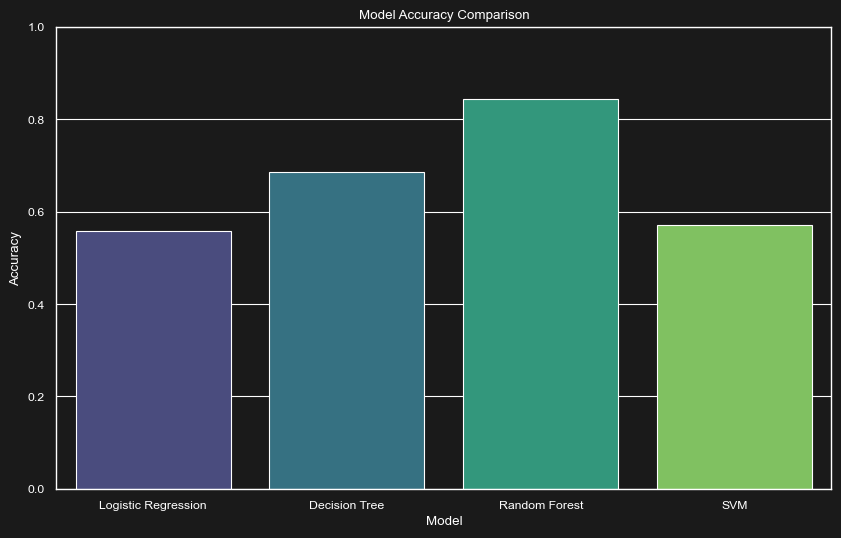

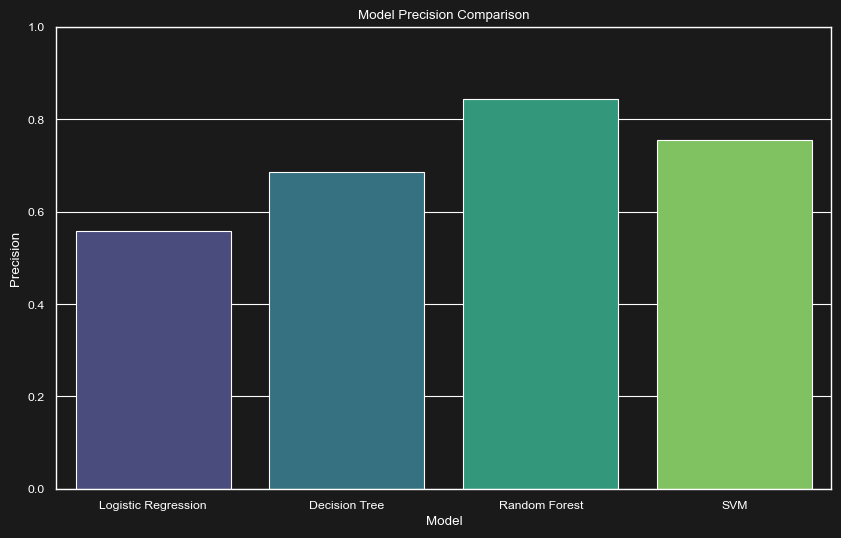

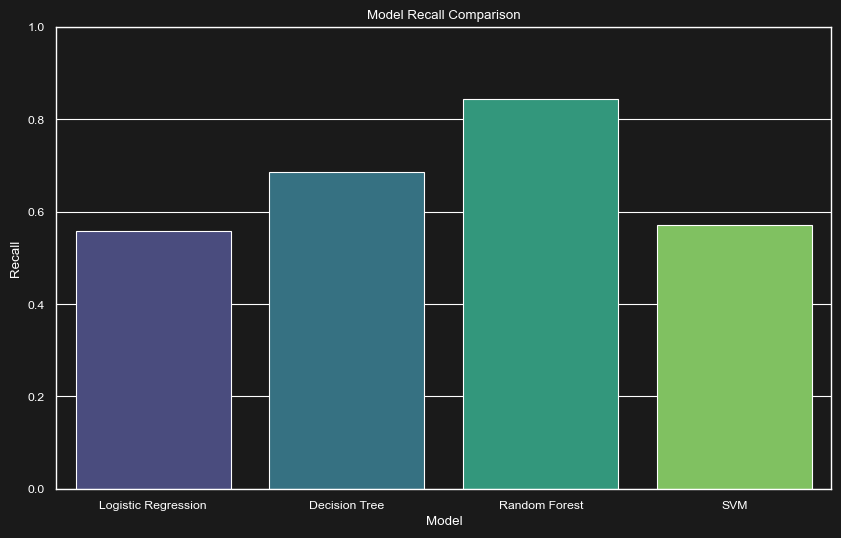

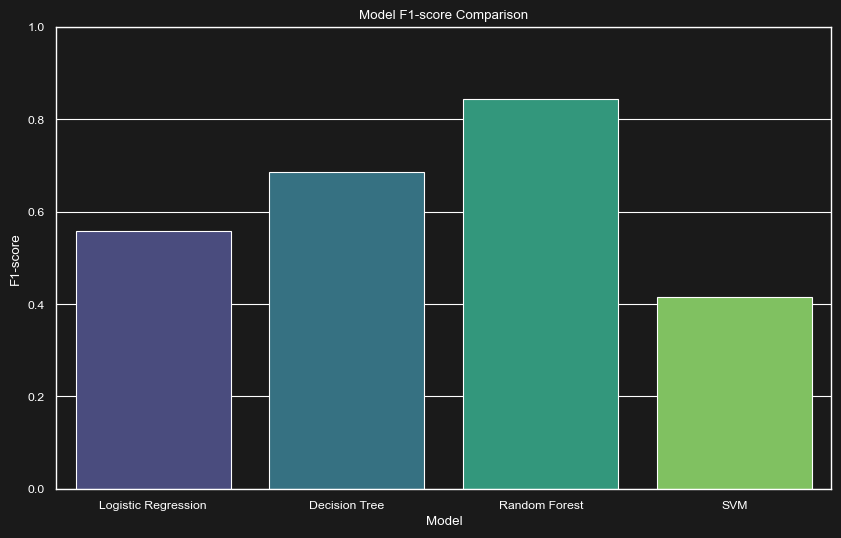

In [220]:
# Encode categorical features
encoder = LabelEncoder()
categorical_columns = ['Disease', 'Fever', 'Cough', 'Fatigue', 
                       'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level']
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])

# Separate features and target variable
X = df.drop(columns='Outcome Variable')
y = encoder.fit_transform(df['Outcome Variable'])  # Encode outcome variable if needed

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers to compare
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate each classifier, and collect performance metrics
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score']
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Set plot style
sns.set_style({"axes.facecolor": ".1"},{'figure.facecolor':'.1'})

# Display results as a formatted table
print("\nClassifier Performance Metrics:")
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False))
print(results_df.to_string(index=False, justify="center"))

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, hue='Model', palette='viridis', legend=False)
plt.title('Model Accuracy Comparison', color="white")
plt.ylabel('Accuracy', color="white")
plt.xlabel('Model', color="white")
plt.tick_params(colors='white')
plt.ylim(0, 1)
plt.show()

# Plot precision, recall, and F1-score comparison
metrics = ['Precision', 'Recall', 'F1-score']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric, data=results_df, hue='Model', palette='viridis', legend=False)
    plt.title(f'Model {metric} Comparison', color="white")
    plt.ylabel(metric, color="white")
    plt.xlabel('Model', color="white")
    plt.tick_params(colors='white')
    plt.ylim(0, 1)
    plt.show()